In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
movies = pd.read_csv('./movies_metadata.csv', encoding='latin-1', low_memory=False)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
movies = movies[['id', 'title', 'overview']]
movies.head(10)

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
5,949,Heat,"Obsessive master thief, Neil McCauley leads a ..."
6,45325,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses..."
7,9091,Sudden Death,International action superstar Jean Claude Van...
8,710,GoldenEye,James Bond must unmask the mysterious head of ...
9,9087,The American President,"Widowed U.S. president Andrew Shepherd, one of..."


In [4]:
len(movies)

45442

In [5]:
movies = movies.drop_duplicates()

In [6]:
len(movies)

45412

<AxesSubplot: >

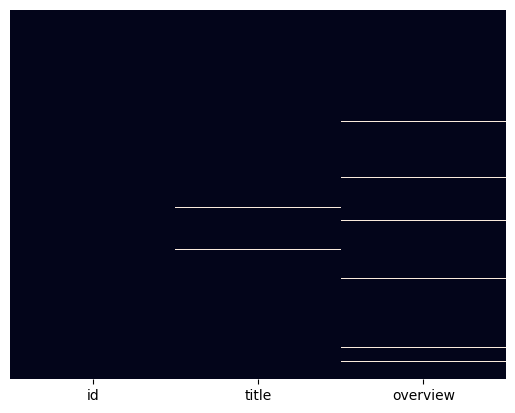

In [7]:
sns.heatmap(movies.isnull(), yticklabels=False, cbar=False)

In [8]:
# 전처리
movies = movies.dropna()

<AxesSubplot: >

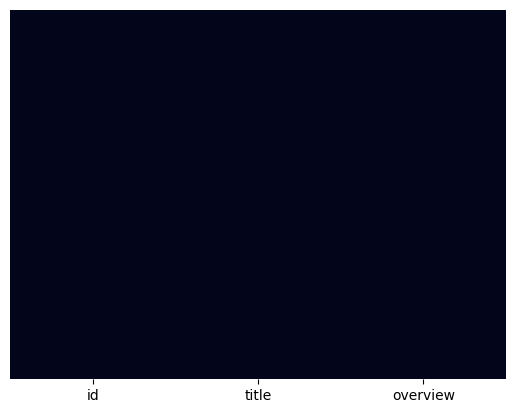

In [9]:
sns.heatmap(movies.isnull(), yticklabels=False, cbar=False)

In [10]:
movies['overview'] = movies['overview'].fillna(' ')

In [11]:
len(movies)

44300

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# 불용어(stopword)를 engllish로 지정하고 tf-idf 계산
# stopword: 언어 분석할때에 의미가 없는 단어들을 말한다. a, about, above, after 등
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['overview'])

In [14]:
print(tfidf_matrix)

  (0, 17940)	0.1350601789607578
  (0, 4665)	0.1473751216178942
  (0, 37874)	0.10190384773780256
  (0, 22032)	0.105020753280208
  (0, 19823)	0.13328594566298135
  (0, 48337)	0.1036328476357594
  (0, 59212)	0.13016028931399973
  (0, 12690)	0.1255138710443882
  (0, 50874)	0.1343961000897376
  (0, 29290)	0.10088923595210991
  (0, 50682)	0.09214233798904524
  (0, 39309)	0.11914179538643202
  (0, 2174)	0.14093120346072274
  (0, 58275)	0.1135543148253892
  (0, 38551)	0.20588051562617954
  (0, 10102)	0.5042587242502197
  (0, 9325)	0.10639933627188589
  (0, 7735)	0.12411884182939677
  (0, 56624)	0.11099572629201628
  (0, 28783)	0.13313240798699374
  (0, 38876)	0.08715237256152102
  (0, 67444)	0.14869240022136296
  (0, 3462)	0.41103879727792
  (0, 72989)	0.4797157762510062
  (0, 37933)	0.1073488898353332
  :	:
  (44298, 27061)	0.07353004188572901
  (44298, 19100)	0.09289403994718433
  (44298, 18295)	0.07461116992207442
  (44298, 38876)	0.06832973825903706
  (44299, 16698)	0.32341459401640876
  (

In [15]:
# cosine 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.01498114 0.         ... 0.         0.0059551  0.        ]
 [0.01498114 1.         0.04696776 ... 0.         0.02201769 0.00935609]
 [0.         0.04696776 1.         ... 0.         0.01407684 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.0059551  0.02201769 0.01407684 ... 0.         1.         0.        ]
 [0.         0.00935609 0.         ... 0.         0.         1.        ]]


In [17]:
cosine_sim = pd.DataFrame(cosine_sim, index=movies.index, columns=movies.index)
cosine_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,45432,45433,45434,45435,45436,45437,45438,45439,45440,45441
0,1.000000,0.014981,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.005955,0.000000
1,0.014981,1.000000,0.046968,0.0,0.00000,0.050222,0.000000,0.102622,0.0,0.007219,...,0.0,0.0,0.0,0.011276,0.0,0.000000,0.066866,0.0,0.022018,0.009356
2,0.000000,0.046968,1.000000,0.0,0.02507,0.000000,0.006414,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.014077,0.000000
3,0.000000,0.000000,0.000000,1.0,0.00000,0.007214,0.008982,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.021457,0.0,0.026478,0.000000,0.0,0.009531,0.016436
4,0.000000,0.000000,0.025070,0.0,1.00000,0.000000,0.000000,0.032820,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.007014,0.000000


In [18]:
len(cosine_sim)

44300

??

In [22]:
movies.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            45432, 45433, 45434, 45435, 45436, 45437, 45438, 45439, 45440,
            45441],
           dtype='int64', length=44300)

In [23]:
movies

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45437,439050,Subdue,Rising and falling between a man and woman.
45438,111109,Century of Birthing,An artist struggles to finish his work while a...
45439,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45440,227506,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [26]:
# index-title을 뒤집는다
indices = pd.Series(movies.index, index=movies['title'])

In [27]:
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45437
Century of Birthing            45438
Betrayal                       45439
Satan Triumphant               45440
Queerama                       45441
Length: 44300, dtype: int64

In [30]:
# 영화 제ㄱ을 받아서 추천 영화를 돌려주는 함수
def content_recommender(title, n_of_recomm):
    # title에서 영화 index 받아오기
    idx = indices[title]
    # 주어진 영화와 다른 영화의 similarity를 가져온다
    sim_scores = cosine_sim[idx]
    print(sim_scores)
    # similarity를 기준으로 정렬하고 n_of_recomm만큼 가져온다(자기자신은 빼고)
    sim_scores = sim_scores.sort_values(ascending=False)[1:n_of_recomm+1]
    # 영화 타이틀 반환
    return movies.loc[sim_scores.index]['title']

In [31]:
# 추천받기
print(content_recommender('The Lion King', 5))
print(content_recommender('The Dark Knight Rises', 10))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45437    0.0
45438    0.0
45439    0.0
45440    0.0
45441    0.0
Name: 358, Length: 44300, dtype: float64
34664    How the Lion Cub and the Turtle Sang a Song
9339                               The Lion King 1Â½
9101                  The Lion King 2: Simba's Pride
42806                                           Prey
25637                                 Fearless Fagan
Name: title, dtype: object
0        0.000000
1        0.006038
2        0.000000
3        0.000000
4        0.000000
           ...   
45437    0.000000
45438    0.000000
45439    0.000000
45440    0.006458
45441    0.007512
Name: 18238, Length: 44300, dtype: float64
12468                                      The Dark Knight
149                                         Batman Forever
1321                                        Batman Returns
15497                           Batman: Under the Red Hood
584                                            

/var/folders/g_/jx94y_rn1h91jyckh5j6tgnh0000gn/T/ipykernel_3314/384155716.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sim_scores = sim_scores.sort_values(ascending=False)[1:n_of_recomm+1]
/var/folders/g_/jx94y_rn1h91jyckh5j6tgnh0000gn/T/ipykernel_3314/384155716.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sim_scores = sim_scores.sort_values(ascending=False)[1:n_of_recomm+1]
